In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn import preprocessing
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import re
from sklearn.preprocessing import MinMaxScaler
import networkx as nx 
pd.set_option('display.width',600)
pd.set_option('display.max_columns',50)

In [3]:
G = nx.Graph()

In [4]:
def plot_bar_x(data):
    plt.figure(1,figsize=(50,30))
    data=data.head(30)
    # this is for plotting purpose
    index = np.arange(len(data.index))
    plt.bar(index, data['NAME'])
    plt.xlabel('Item Names', fontsize=30)
    plt.ylabel('Items Sold Count', fontsize=30)
    plt.xticks(index, data.index, fontsize=30, rotation=90)
    plt.title('Frequency Distribution Of Each Item')
    plt.show()

In [5]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    if x=='nan':
        return 0

In [6]:
le = preprocessing.LabelEncoder()
df=pd.read_csv('data/data.csv')
df=df.iloc[353810:380000,:]
df.head(5)

,DATENEW,RECEIPT,NAME,UNITS
353810,2018-01-02,427740f1-d34c-4feb-8912-d45acb067a1f,Tomatoes Truss,0.484
353811,2018-01-02,427740f1-d34c-4feb-8912-d45acb067a1f,Peaches Yellow,0.962
353812,2018-01-02,427740f1-d34c-4feb-8912-d45acb067a1f,Onion brown,0.824
353813,2018-01-02,427740f1-d34c-4feb-8912-d45acb067a1f,Peeled Plum Tomatoes,5.000
353814,2018-01-02,427740f1-d34c-4feb-8912-d45acb067a1f,Pumpkin Grey,0.944


In [7]:
df['NAME'] = df['NAME'].str.strip()
df['RECEIPT'] = df['RECEIPT'].astype('str')
df['UNITS'] = df['UNITS'].astype('float64')
df['UNITS'] = df['UNITS'].round(0)
df

,DATENEW,RECEIPT,NAME,UNITS
353810,2018-01-02,427740f1-d34c-4feb-8912-d45acb067a1f,Tomatoes Truss,0.0
353811,2018-01-02,427740f1-d34c-4feb-8912-d45acb067a1f,Peaches Yellow,1.0
353812,2018-01-02,427740f1-d34c-4feb-8912-d45acb067a1f,Onion brown,1.0
353813,2018-01-02,427740f1-d34c-4feb-8912-d45acb067a1f,Peeled Plum Tomatoes,5.0
353814,2018-01-02,427740f1-d34c-4feb-8912-d45acb067a1f,Pumpkin Grey,1.0
...,...,...,...,...
379995,2018-02-13,1f4725cd-5fc5-4595-b505-cbe0c80965ef,Apricots,0.0
379996,2018-02-13,83f66160-42ae-4b63-8ec7-a098bc881f20,Carrots,1.0
379997,2018-02-13,83f66160-42ae-4b63-8ec7-a098bc881f20,Field Tomatoes,1.0
379998,2018-02-13,75c338c0-71fb-4d52-b9b7-fbae24512828,Plums Red,1.0


                         NAME
Banana Cavendish         1549
Watermelon seedless      1078
Cherries                  641
Nectarine White           606
Field Tomatoes            565
...                       ...
Mustatd Sauce 375g          1
Pistachios Salted 350g      1
Whole Chilli500g            1
Garlic 500g                 1
Elephant House EGB 1.5L     1

[610 rows x 1 columns]


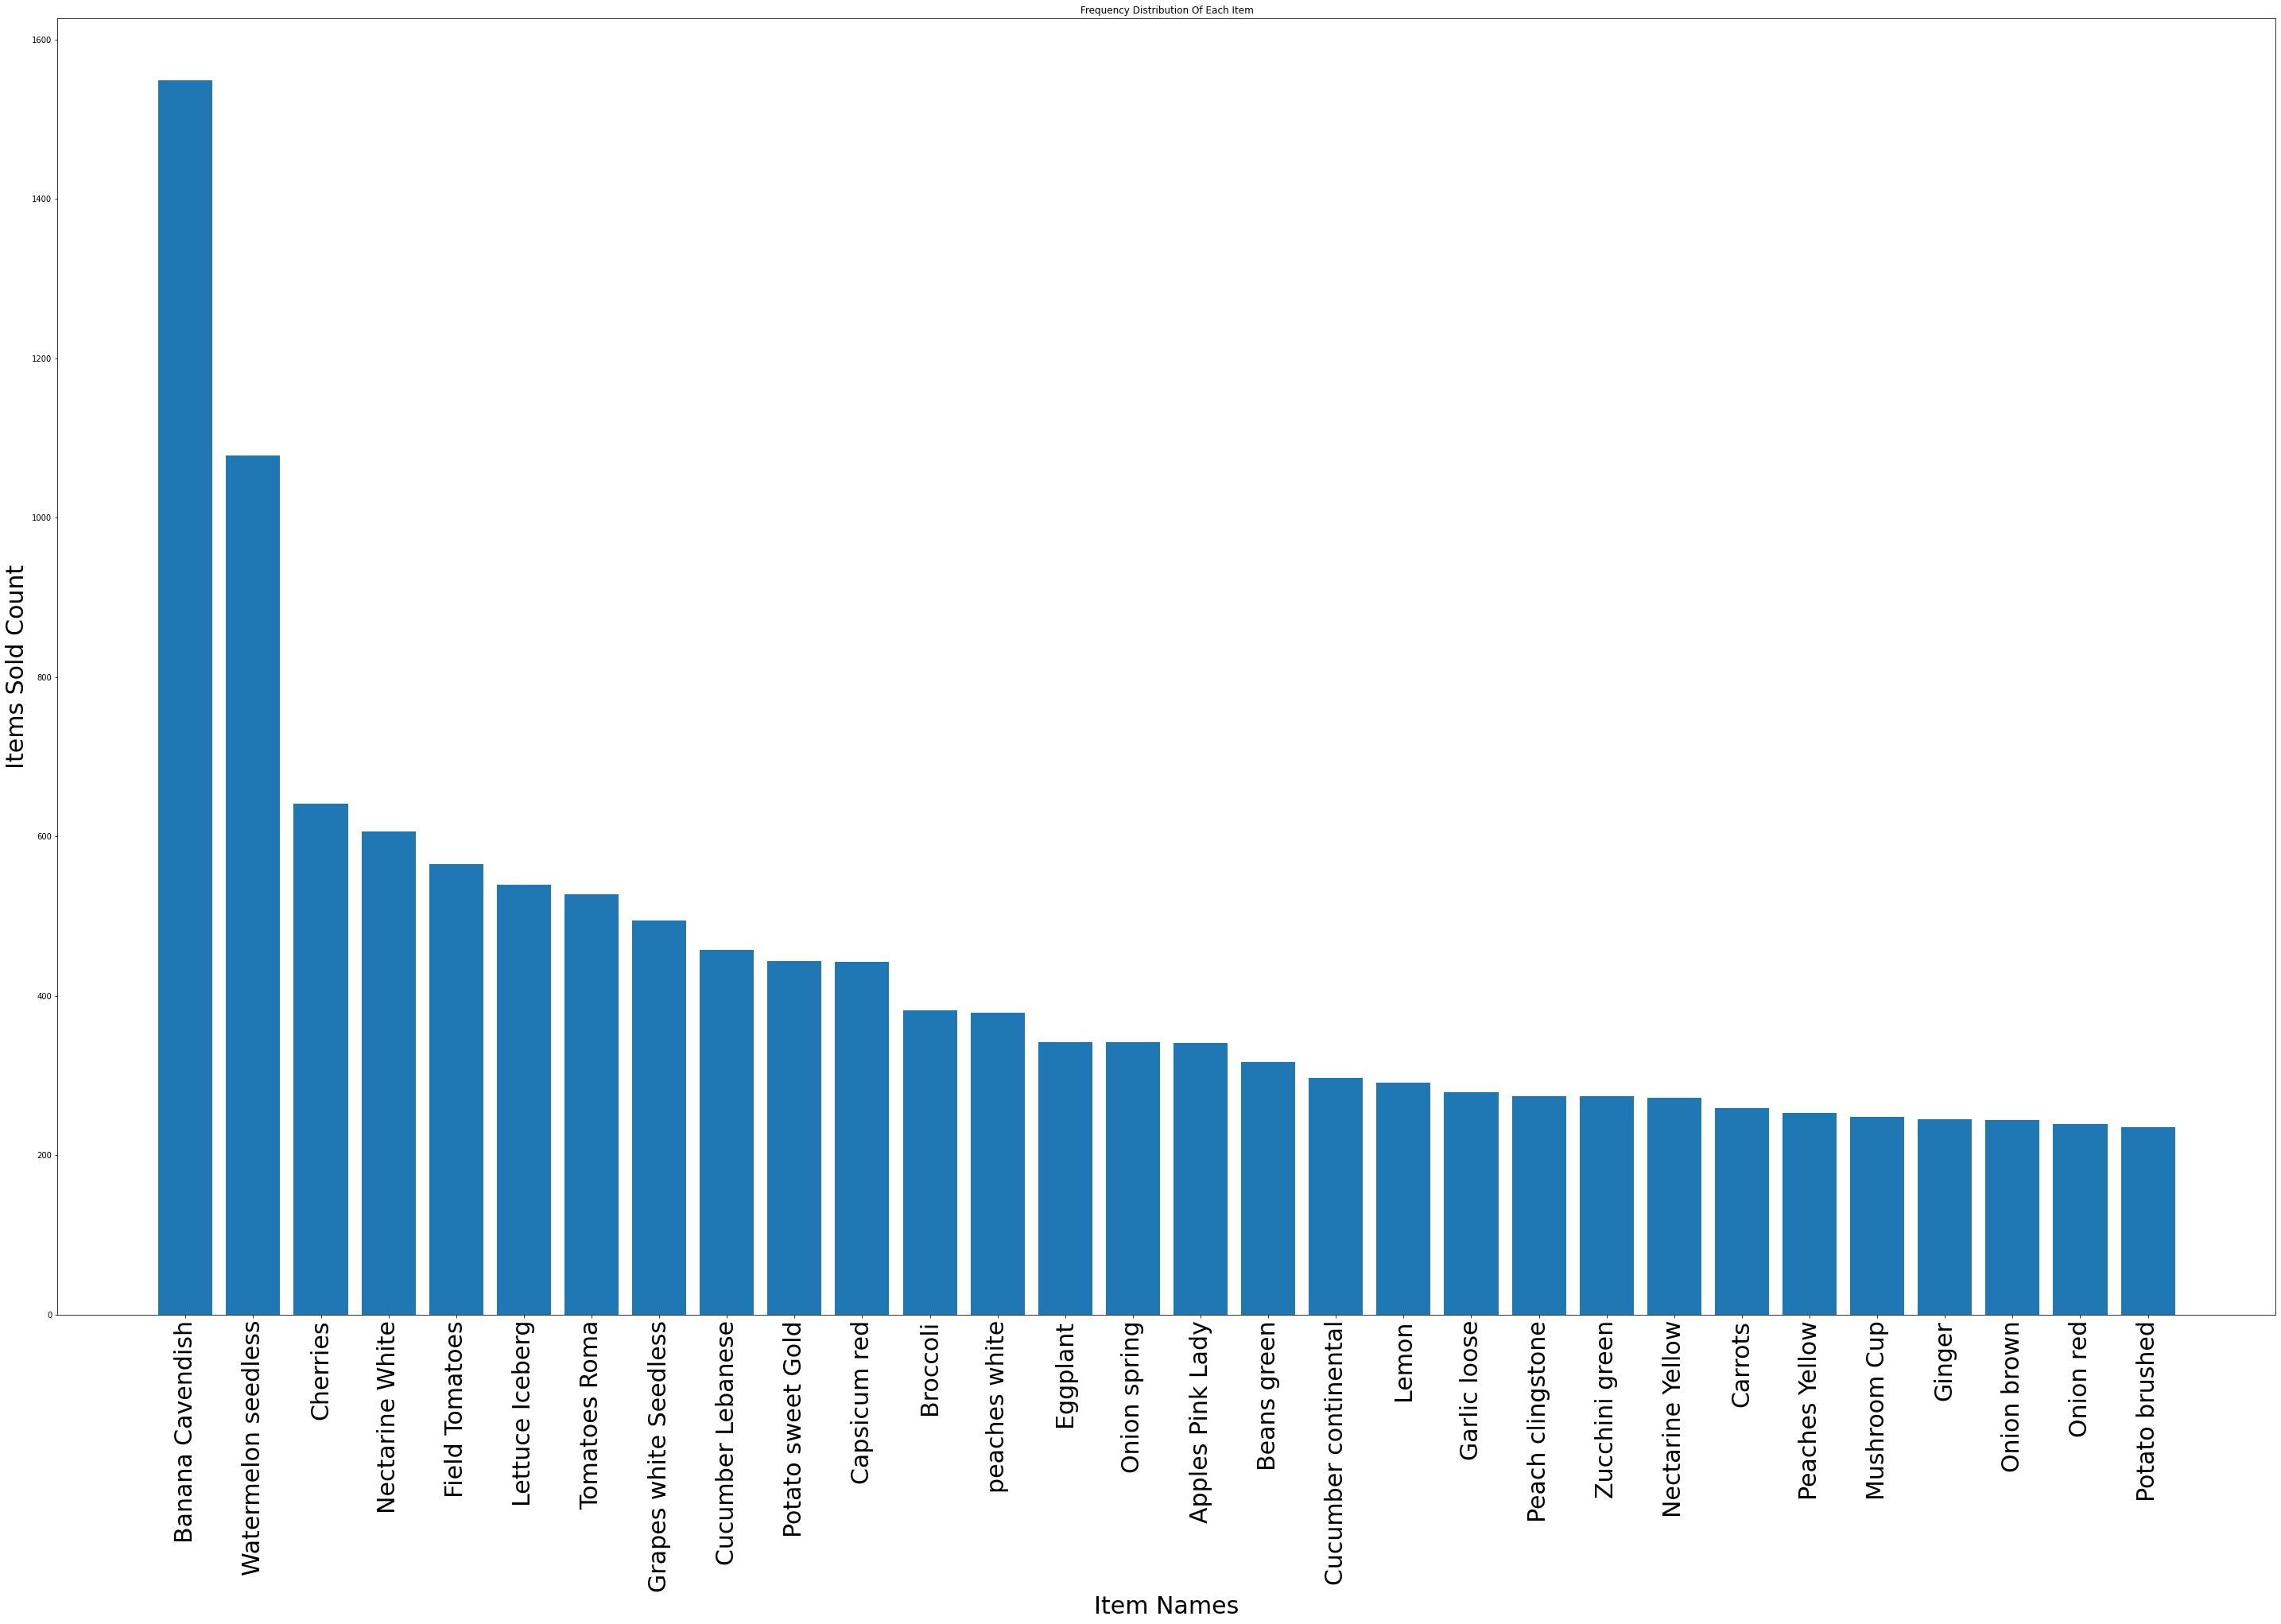

In [8]:
item_frequency=df['NAME'].value_counts()
item_frequency=pd.DataFrame(item_frequency)
print(item_frequency)
plot_bar_x(item_frequency)

In [9]:
basket = (df
          .groupby(['RECEIPT', 'NAME'])['UNITS']
          .sum().unstack().reset_index().fillna(0)
          .set_index('RECEIPT'))
basket

NAME,2kg Marsh Grapefruit,3kg Valencia Oranges,Adzuki Beans 500g,Al Nakhil Tahina 454g,Alfa Alfa,Almond Cresent 250g,Almonds Natural 500g,Almonds Roasted 375g,Amber Jewl plum,Amberella Curry,Ambulthiyal Mix LA,Apple Granny smith 2kg Bags,Apple Rings 500g,Apples Fuji,Apples Golden Delicious,Apples Granny Smith,Apples Pink Lady,Apples Red Delicious,Apples Royal Gala,Apricot Dried 500g,Apricots,Atta 5kg Dia,Atta Chakki Fresh,Aussie Cucumber,Australian Asparagus green,...,cabbage half,cabbage red half,chick pea flour 1kg pattu,chilli yellow long,chocolate cream bis 2 for 5.50,choy sum 2 for $ 1.99,eggs 800g,fish curry mix 375g,grapes sulthana,kohlrabi,onion brown 10kg,onion brown 2kg large,onion red 2kg,peaches white,pear corella,potatoes Red 5kg,red Split lentils 5kg,salted olives Black,sinhala Pickle 375g MD,vanila powder 15g,wash potatoes 5kg,white Raw Rice 5kg Derana,wijaya chilli powder 500g,wijaya kurakkan Flour 400g,wombok half
RECEIPT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
001b6763-8e40-4aa9-9e4d-4e47813042db,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0026e196-660b-455a-a7f8-d0312f999e5f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002bda24-52a1-4454-864f-69226b725d91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00353aa0-7ee7-4664-9337-4c8c3ac62cf4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
003e42e9-5ddb-4c3e-96f7-5b637e383e98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffd322ed-a2af-4f3f-a695-cab72517fb76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ffd69bbe-3b3a-499b-9463-b767d62a7238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ffebbdeb-267c-45c7-8409-39f1e23bea32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
basket_sets = basket.applymap(encode_units)
basket_sets

NAME,2kg Marsh Grapefruit,3kg Valencia Oranges,Adzuki Beans 500g,Al Nakhil Tahina 454g,Alfa Alfa,Almond Cresent 250g,Almonds Natural 500g,Almonds Roasted 375g,Amber Jewl plum,Amberella Curry,Ambulthiyal Mix LA,Apple Granny smith 2kg Bags,Apple Rings 500g,Apples Fuji,Apples Golden Delicious,Apples Granny Smith,Apples Pink Lady,Apples Red Delicious,Apples Royal Gala,Apricot Dried 500g,Apricots,Atta 5kg Dia,Atta Chakki Fresh,Aussie Cucumber,Australian Asparagus green,...,cabbage half,cabbage red half,chick pea flour 1kg pattu,chilli yellow long,chocolate cream bis 2 for 5.50,choy sum 2 for $ 1.99,eggs 800g,fish curry mix 375g,grapes sulthana,kohlrabi,onion brown 10kg,onion brown 2kg large,onion red 2kg,peaches white,pear corella,potatoes Red 5kg,red Split lentils 5kg,salted olives Black,sinhala Pickle 375g MD,vanila powder 15g,wash potatoes 5kg,white Raw Rice 5kg Derana,wijaya chilli powder 500g,wijaya kurakkan Flour 400g,wombok half
RECEIPT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
001b6763-8e40-4aa9-9e4d-4e47813042db,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0026e196-660b-455a-a7f8-d0312f999e5f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
002bda24-52a1-4454-864f-69226b725d91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
00353aa0-7ee7-4664-9337-4c8c3ac62cf4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
003e42e9-5ddb-4c3e-96f7-5b637e383e98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffd322ed-a2af-4f3f-a695-cab72517fb76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ffd69bbe-3b3a-499b-9463-b767d62a7238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ffebbdeb-267c-45c7-8409-39f1e23bea32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
frequent_itemsets = apriori(basket_sets, min_support=0.004, use_colnames=True)
print(frequent_itemsets)

      support                                           itemsets
0    0.013558                             (3kg Valencia Oranges)
1    0.007136                                      (Apples Fuji)
2    0.017554                              (Apples Granny Smith)
3    0.034965                                 (Apples Pink Lady)
4    0.009705                                (Apples Royal Gala)
..        ...                                                ...
209  0.006565               (Watermelon seedless, peaches white)
210  0.004139  (Grapes white Seedless, Banana Cavendish, Nect...
211  0.004424  (Banana Cavendish, Lettuce Iceberg, Watermelon...
212  0.006279  (Banana Cavendish, Nectarine White, Watermelon...
213  0.004139  (Banana Cavendish, Nectarine White, peaches wh...

[214 rows x 2 columns]


In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Banana Cavendish),(3kg Valencia Oranges),0.185386,0.013558,0.004995,0.026944,1.987318,0.002482,1.013757
1,(3kg Valencia Oranges),(Banana Cavendish),0.013558,0.185386,0.004995,0.368421,1.987318,0.002482,1.289805
2,(Banana Cavendish),(Apples Granny Smith),0.185386,0.017554,0.004995,0.026944,1.534921,0.001741,1.009650
3,(Apples Granny Smith),(Banana Cavendish),0.017554,0.185386,0.004995,0.284553,1.534921,0.001741,1.138608
4,(Apples Pink Lady),(Banana Cavendish),0.034965,0.185386,0.014557,0.416327,2.245727,0.008075,1.395667
...,...,...,...,...,...,...,...,...,...
201,"(Banana Cavendish, peaches white)",(Nectarine White),0.011703,0.071072,0.004139,0.353659,4.976075,0.003307,1.437210
202,"(Nectarine White, peaches white)",(Banana Cavendish),0.008563,0.185386,0.004139,0.483333,2.607172,0.002551,1.576672
203,(Banana Cavendish),"(Nectarine White, peaches white)",0.185386,0.008563,0.004139,0.022325,2.607172,0.002551,1.014076
204,(Nectarine White),"(Banana Cavendish, peaches white)",0.071072,0.011703,0.004139,0.058233,4.976075,0.003307,1.049407


In [13]:
for x in range(len(rules)):
    print(rules['antecedents'][x])
    result1=re.findall(r"\w+ \w+|\w+",str(rules['antecedents'][x]))
    print(result1)
    result2=re.findall(r"\w+ \w+|\w+",str(rules['consequents'][x]))
    rules.at[x, 'antecedents'] = result1[1]
    rules.at[x, 'consequents'] = result2[1]



A=rules['antecedents'].tolist()
B=rules['consequents'].tolist()
details=[]
print(A)
for x in range(len(A)):
    txt=(A[x],B[x])
    details.append(txt)

frozenset({'Banana Cavendish'})
['frozenset', 'Banana Cavendish']
frozenset({'3kg Valencia Oranges'})
['frozenset', '3kg Valencia', 'Oranges']
frozenset({'Banana Cavendish'})
['frozenset', 'Banana Cavendish']
frozenset({'Apples Granny Smith'})
['frozenset', 'Apples Granny', 'Smith']
frozenset({'Apples Pink Lady'})
['frozenset', 'Apples Pink', 'Lady']
frozenset({'Banana Cavendish'})
['frozenset', 'Banana Cavendish']
frozenset({'Apples Pink Lady'})
['frozenset', 'Apples Pink', 'Lady']
frozenset({'Nectarine White'})
['frozenset', 'Nectarine White']
frozenset({'Apples Pink Lady'})
['frozenset', 'Apples Pink', 'Lady']
frozenset({'Watermelon seedless'})
['frozenset', 'Watermelon seedless']
frozenset({'Banana Cavendish'})
['frozenset', 'Banana Cavendish']
frozenset({'Avocado Hass Large'})
['frozenset', 'Avocado Hass', 'Large']
frozenset({'Banana Cavendish'})
['frozenset', 'Banana Cavendish']
frozenset({'Berries Strawberry (medium)'})
['frozenset', 'Berries Strawberry', 'medium']
frozenset({'B

In [15]:
details

[('Banana Cavendish', '3kg Valencia'),
 ('3kg Valencia', 'Banana Cavendish'),
 ('Banana Cavendish', 'Apples Granny'),
 ('Apples Granny', 'Banana Cavendish'),
 ('Apples Pink', 'Banana Cavendish'),
 ('Banana Cavendish', 'Apples Pink'),
 ('Apples Pink', 'Nectarine White'),
 ('Nectarine White', 'Apples Pink'),
 ('Apples Pink', 'Watermelon seedless'),
 ('Watermelon seedless', 'Apples Pink'),
 ('Banana Cavendish', 'Avocado Hass'),
 ('Avocado Hass', 'Banana Cavendish'),
 ('Banana Cavendish', 'Berries Strawberry'),
 ('Berries Strawberry', 'Banana Cavendish'),
 ('Banana Cavendish', 'Calypso mango'),
 ('Calypso mango', 'Banana Cavendish'),
 ('Banana Cavendish', 'Carrots 1kg'),
 ('Carrots 1kg', 'Banana Cavendish'),
 ('Banana Cavendish', 'Cauliflower'),
 ('Cauliflower', 'Banana Cavendish'),
 ('Banana Cavendish', 'Celery'),
 ('Celery', 'Banana Cavendish'),
 ('Banana Cavendish', 'Cucumber Lebanese'),
 ('Cucumber Lebanese', 'Banana Cavendish'),
 ('Banana Cavendish', 'Cucumber continental'),
 ('Cucumb

/kaggle/input/market-basket/Market_basket_df.csv
           DATENEW                               RECEIPT                    NAME  UNITS
353810  2018-01-02  427740f1-d34c-4feb-8912-d45acb067a1f          Tomatoes Truss  0.484
353811  2018-01-02  427740f1-d34c-4feb-8912-d45acb067a1f          Peaches Yellow  0.962
353812  2018-01-02  427740f1-d34c-4feb-8912-d45acb067a1f             Onion brown  0.824
353813  2018-01-02  427740f1-d34c-4feb-8912-d45acb067a1f    Peeled Plum Tomatoes  5.000
353814  2018-01-02  427740f1-d34c-4feb-8912-d45acb067a1f            Pumpkin Grey  0.944
...            ...                                   ...                     ...    ...
530523  2019-01-02  8c15e675-0c4a-4dba-997f-067388e3f229        Maccheroni No.32  1.000
530524  2019-01-02  8c15e675-0c4a-4dba-997f-067388e3f229  Tomato,Onion & Garlic   1.000
530525  2019-01-02  25dad287-b61f-4ae9-a9b2-fa6e7aa5800b           Potato washed  0.532
530526  2019-01-02  25dad287-b61f-4ae9-a9b2-fa6e7aa5800b               

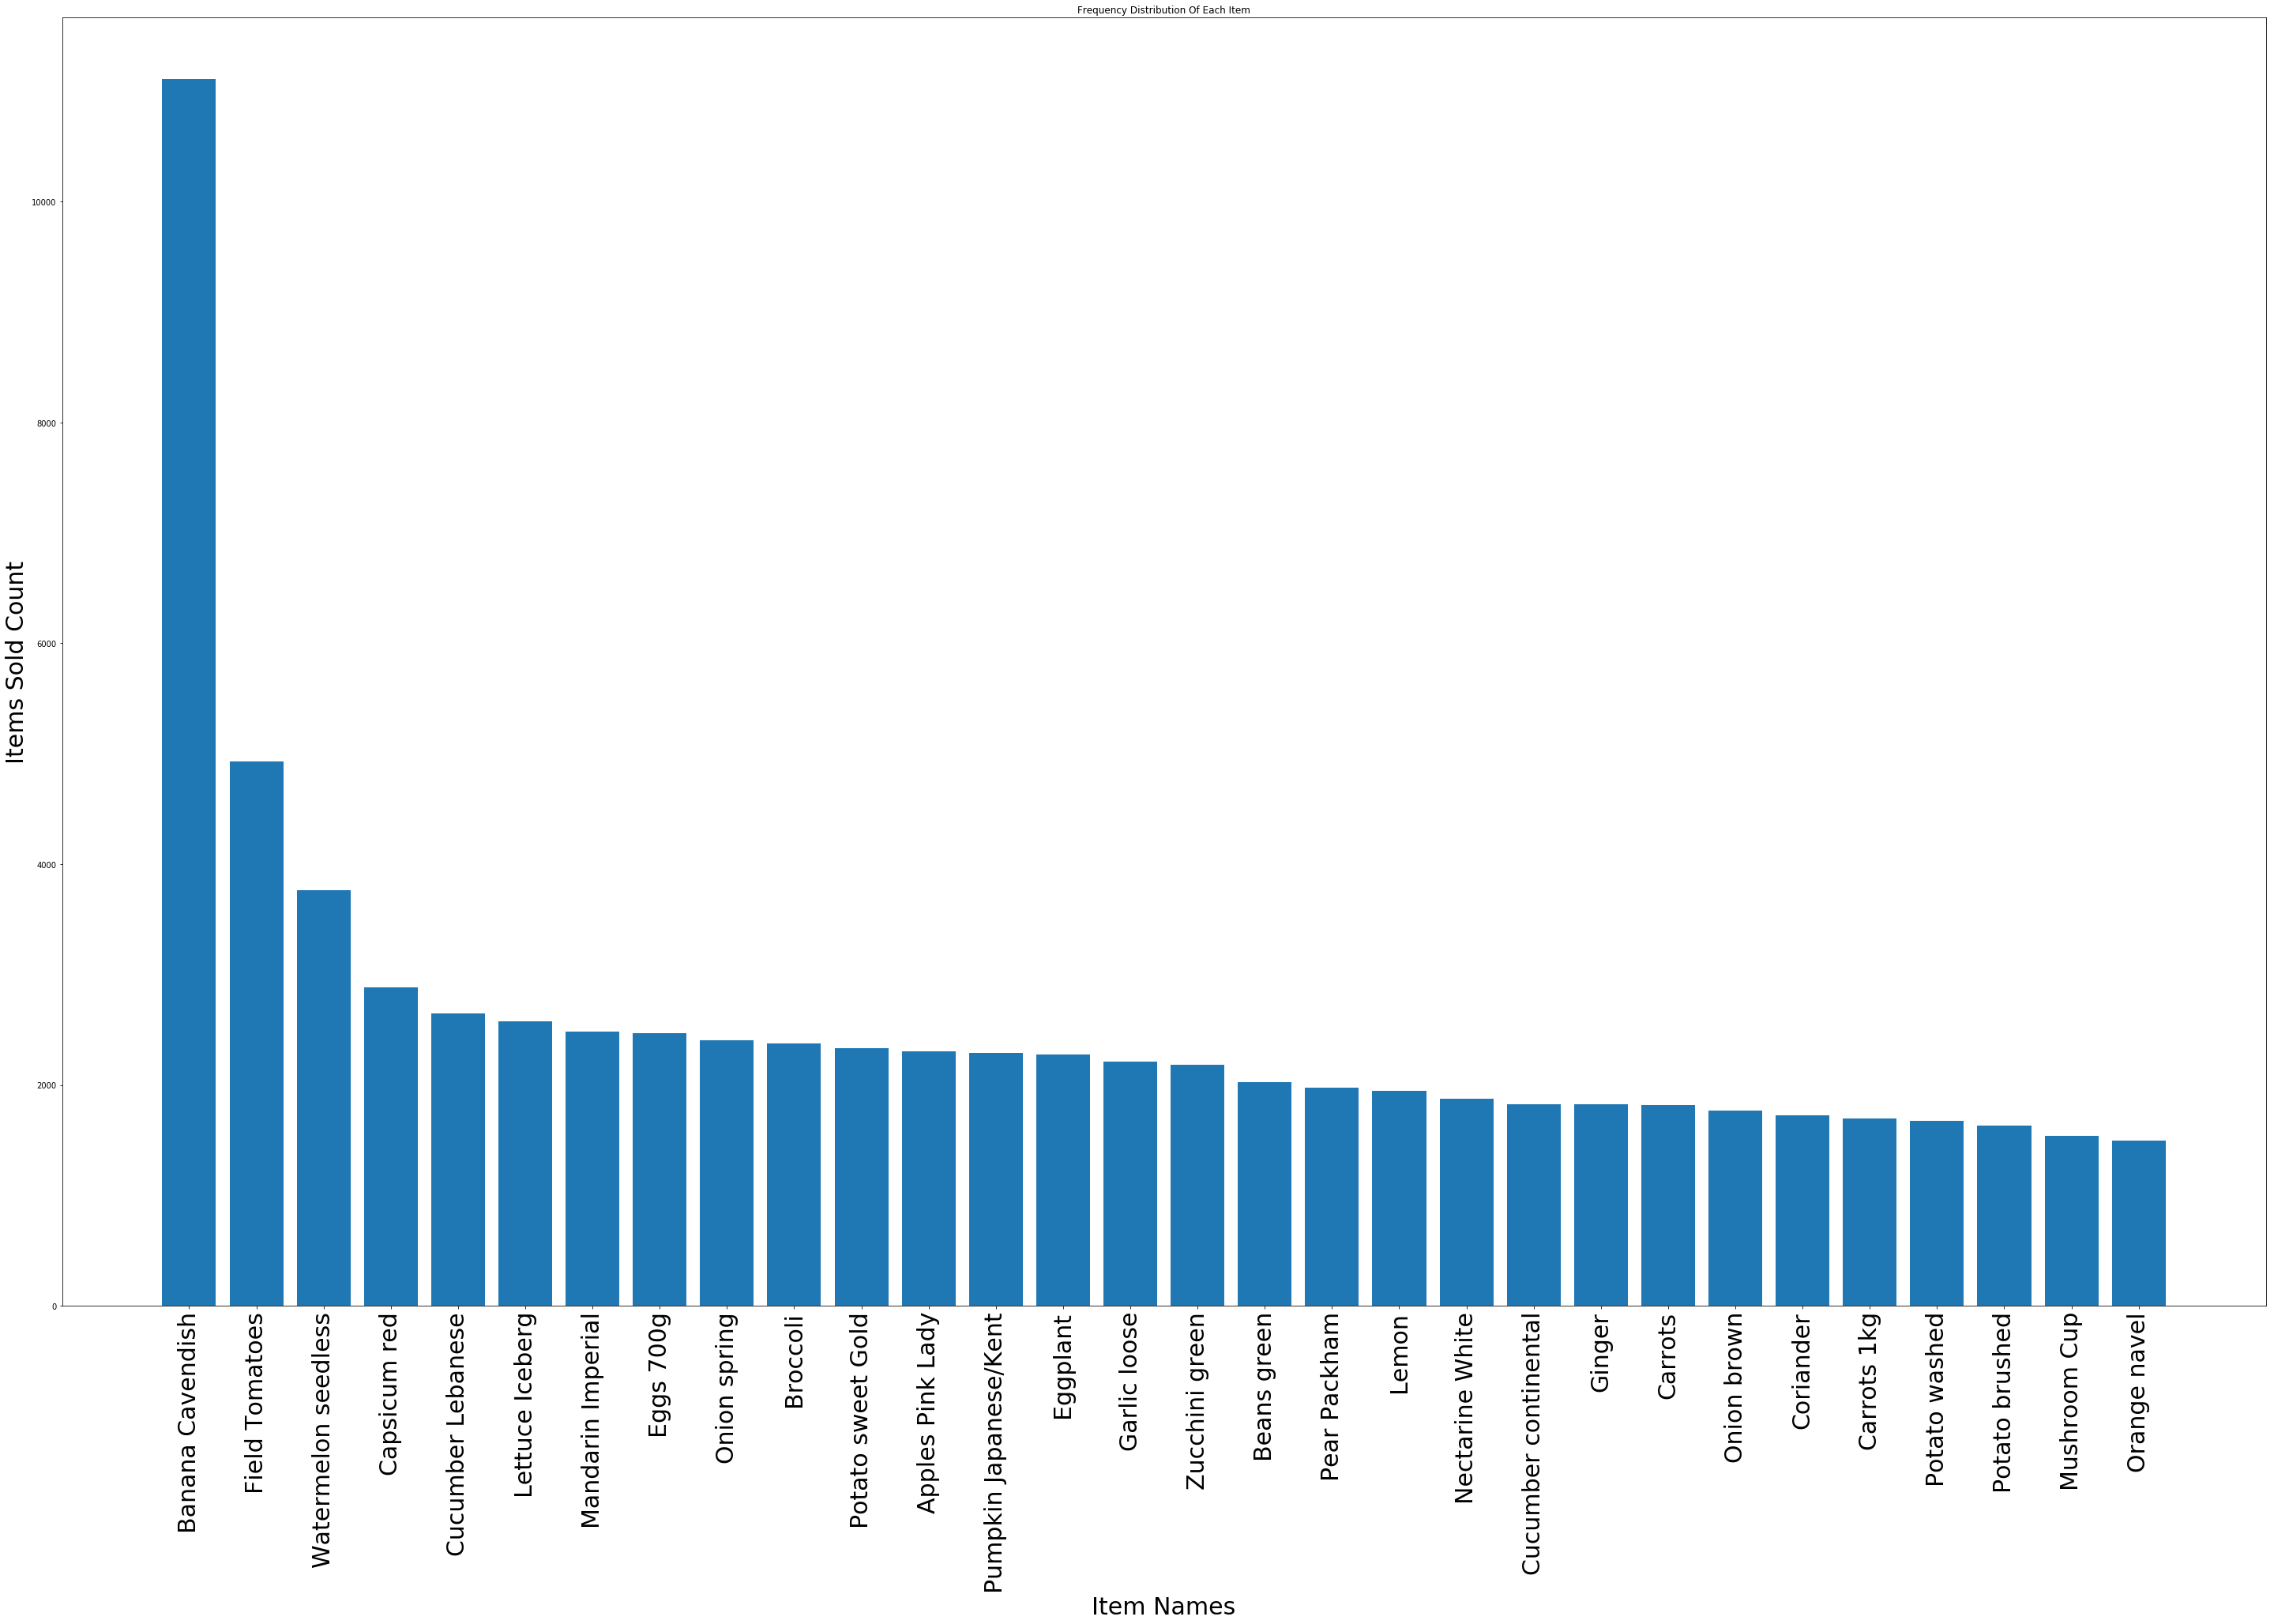

NAME                                  1Lt Coconut Oil Ver  2kg Marsh Grapefruit  2kg Royal gala apple  3kg Marsh Grapefruit  3kg Valencia Oranges  ...  wijaya chilli powder 500g  wijaya chinese Noodles  wijaya kurakkan Flour 400g  wombok half  ya pears
RECEIPT                                                                                                                                            ...                                                                                                      
0002d6fc-1efa-43de-ba27-a683a1ee7ab8                  0.0                   0.0                   0.0                   0.0                   0.0  ...                        0.0                     0.0                         0.0          0.0       0.0
00046d12-498b-4a20-93aa-e283e4bf7019                  0.0                   0.0                   0.0                   0.0                   0.0  ...                        0.0                     0.0                         0.0          0.

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning:

Legend does not support 'L' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning:

Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning:

Legend does not support 'f' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:798: UserWarning:

Legend does not support 't' instances.
A proxy artist may be used instead.
See: http

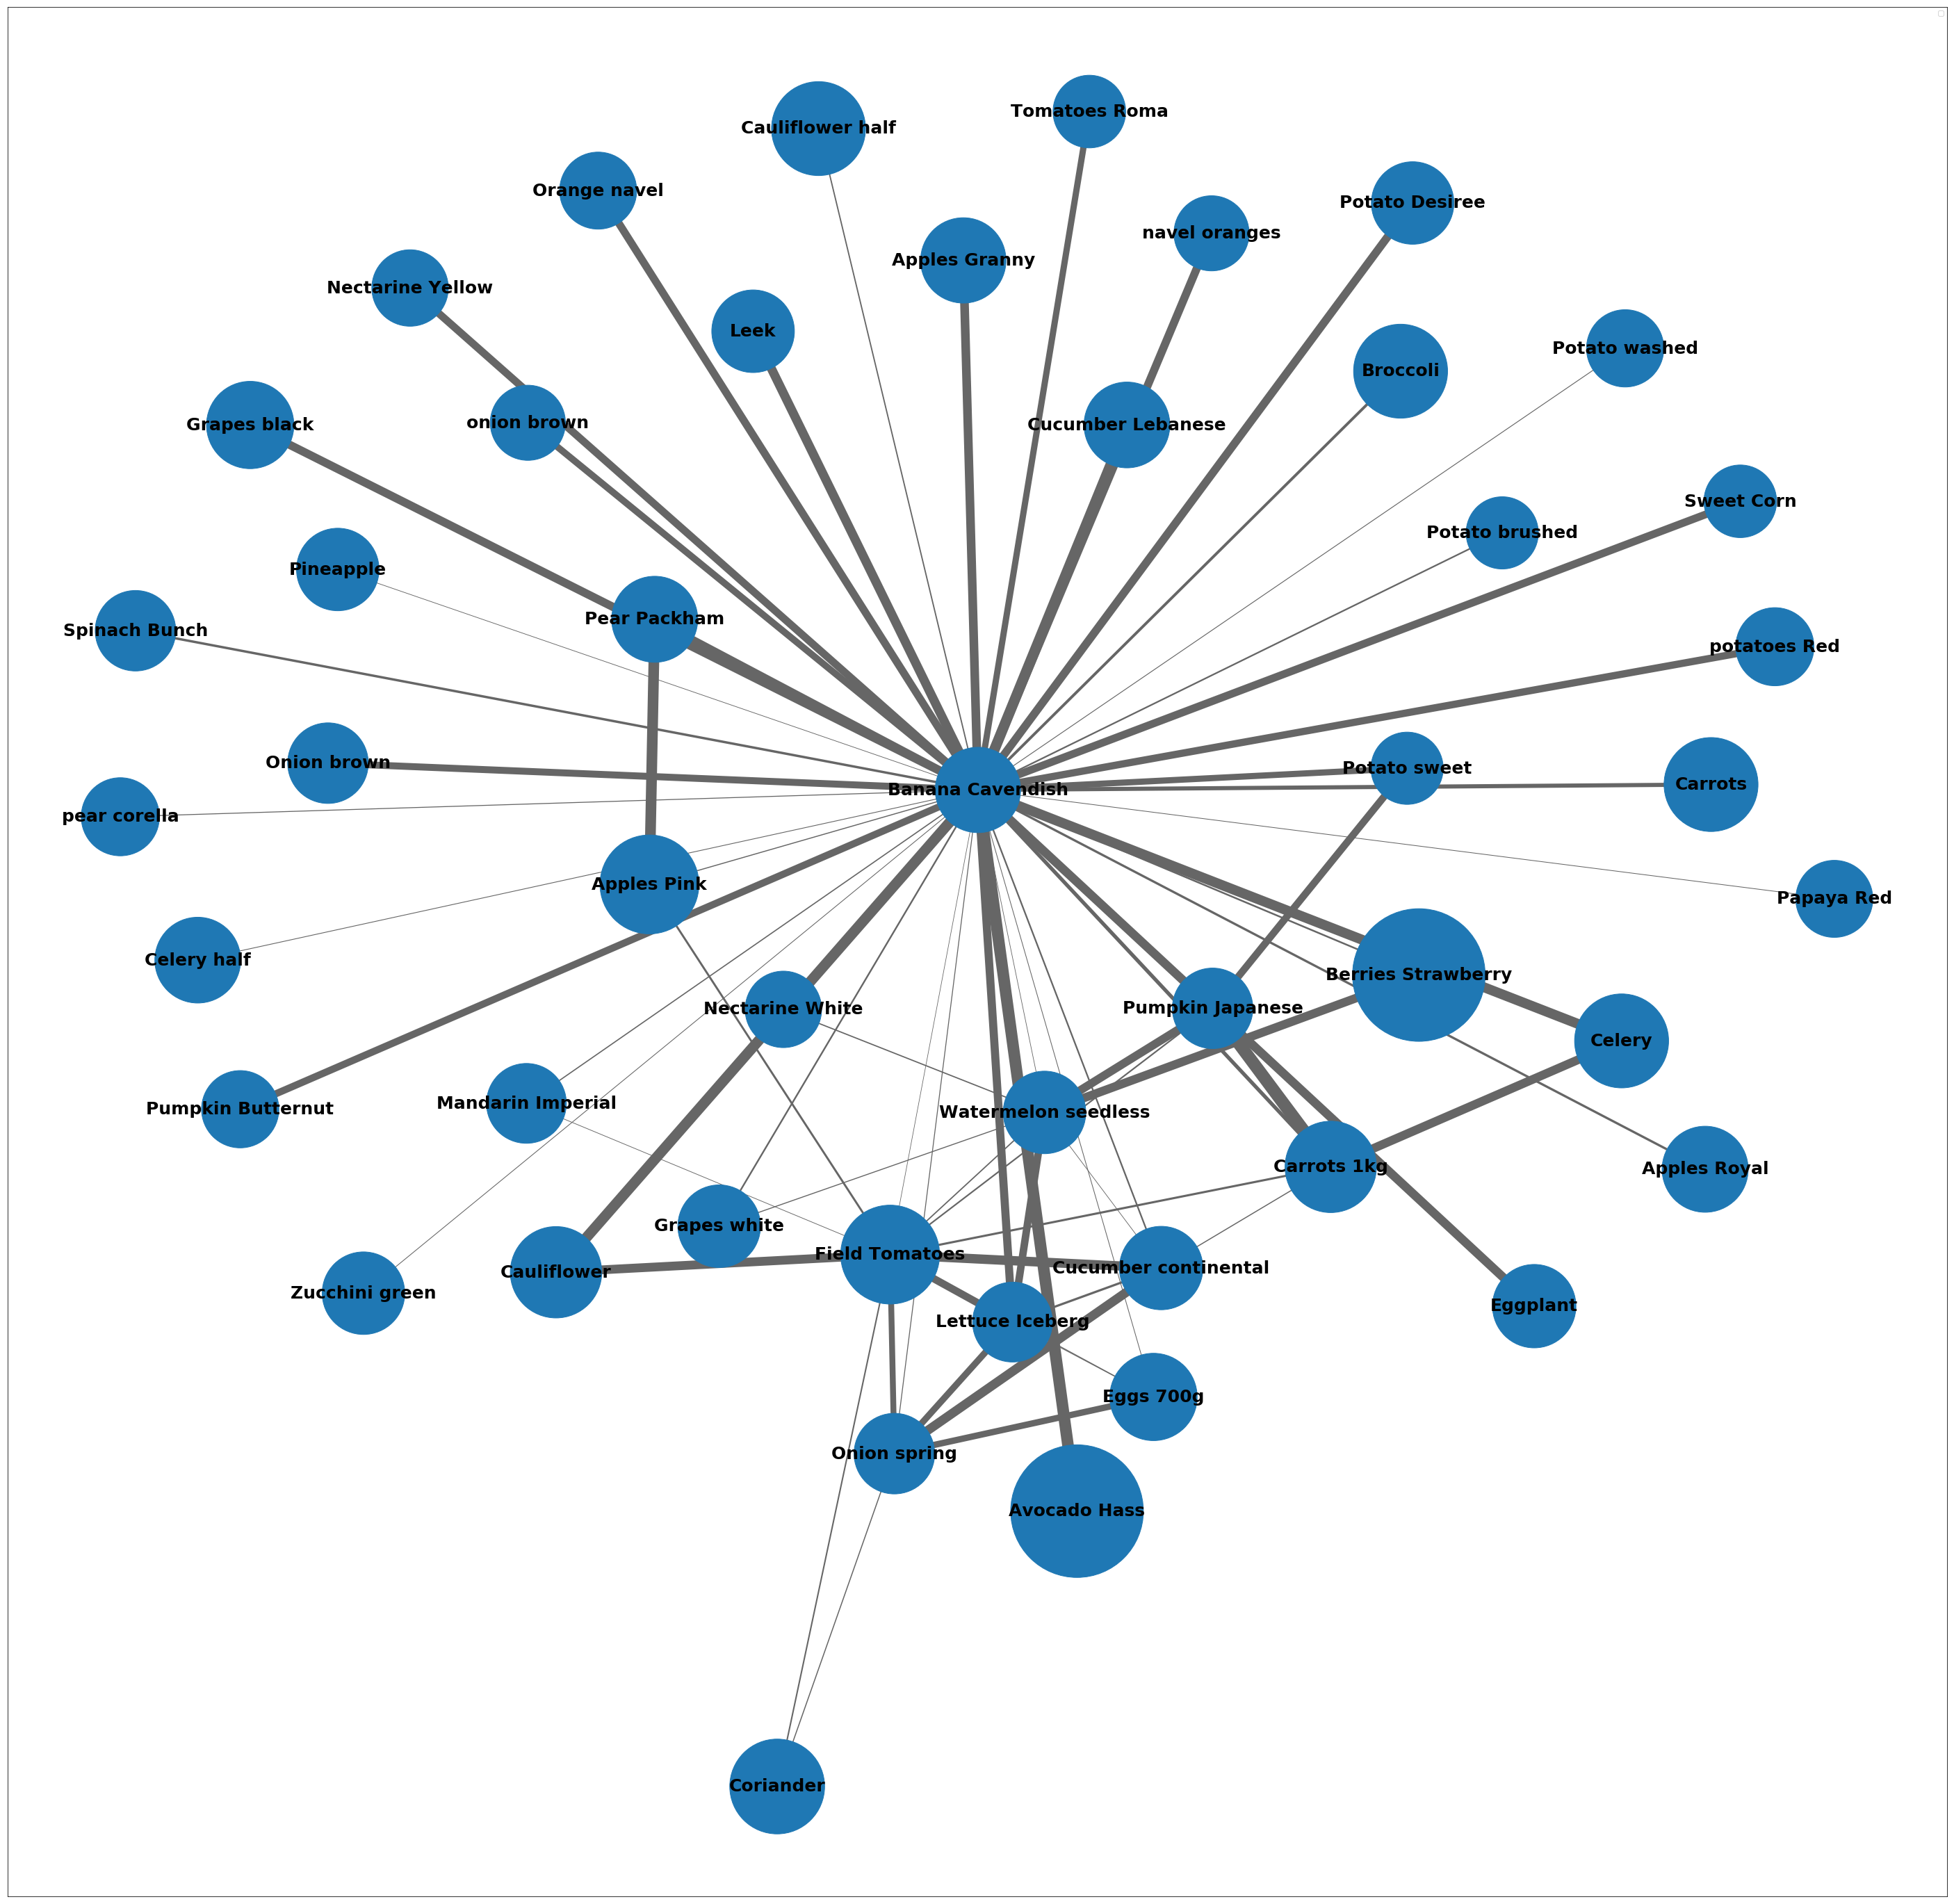

In [1]:
lift_size= [i * 10000 for i in rules['lift'].tolist()]
edge_width = [i * 40 for i in rules['confidence'].tolist()] 
node_color=[i * 40 for i in rules['support'].tolist()] 
#node_colors = range(0, 42)
scaler =MinMaxScaler(feature_range=(0, 13))
node_color=scaler.fit_transform((np.array(node_color)).reshape(-1,1))
node_color=(np.around(node_color.reshape(-1))).tolist()

#print(edge_width)
#node_color=my_new_list = [i * 2000 for i in rules['lift'].tolist()]
plt.figure(2,figsize=(50,50))
G.add_edges_from(details) 
nx.draw_networkx(G, with_label = True,node_size = lift_size, width=edge_width,edge_color ='.4',cmap=plt.cm.Blues,font_weight='bold',font_size=25) 
#plt.axis('off')
plt.legend('Lift', 'Confidence')
plt.show()  

      
    
    

fig = go.Figure(data=[go.Scatter(
    x=rules['support'].tolist(),
    y=rules['confidence'].tolist(),
    mode='markers',
    text=details,
    marker=dict(
        color=rules['lift'].tolist(),
        size=np.arange(0,len(lift_size)),
        showscale=True,
       
        )
)])

fig.show()